Linear Regression with MAE:

custom model mae: 0.31664386479742374
sklearn model mae: 0.3165485644872471


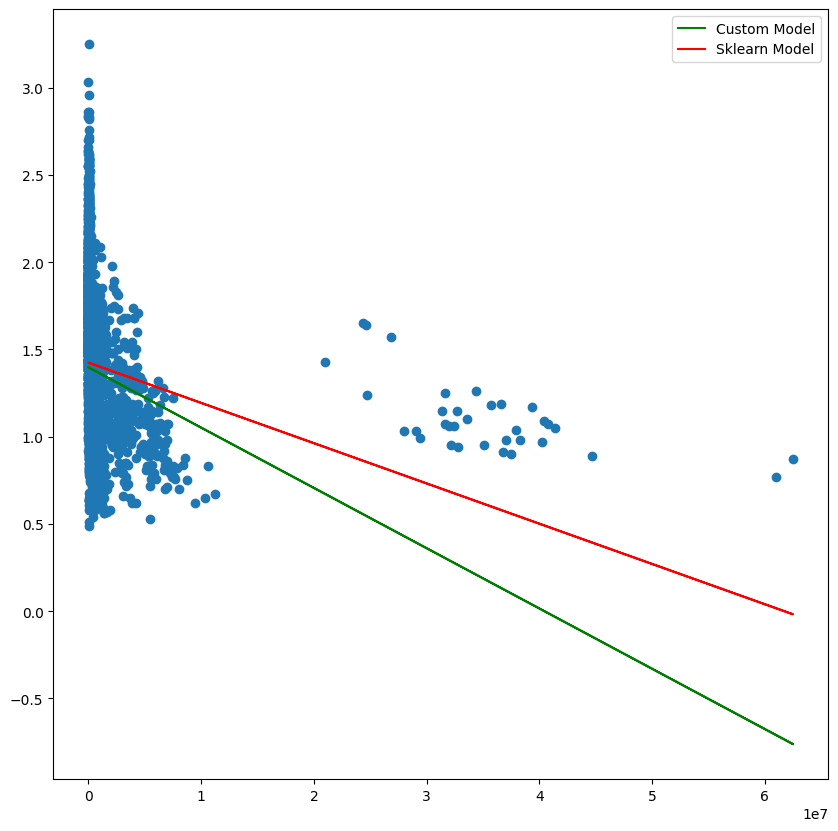

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


dataset = pd.read_csv("E:\\Desktop\\Machine Learning\\SBU Tasks\\exercise_2\\data\\avocado.csv")

features = dataset[['Total Volume']]
target = dataset[['AveragePrice']]


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class CustomLinearRegression:
    def __init__(self, learning_rate=0.2, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coefficients = None
        self.intercept = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.coefficients = np.random.randn(n_features)

        for _ in range(self.iterations):
            y_hat = np.dot(X, self.coefficients) + self.intercept
            errors = y_hat - y.values.ravel()

            gradient_coefficients = np.dot(X.T, np.sign(errors)) / n_samples
            gradient_intercept = np.sign(errors).mean()

            self.coefficients -= self.learning_rate * gradient_coefficients
            self.intercept -= self.learning_rate * gradient_intercept

    def predict(self, X):
        return np.dot(X, self.coefficients) + self.intercept

    def mean_absolute_error(self, y, y_hat):
        return np.mean(np.abs(y_hat - y.values.ravel()))


custom_model = CustomLinearRegression()
custom_model.fit(X_train_scaled, y_train)
custom_model_predictions = custom_model.predict(X_test_scaled)
custom_model_mae = custom_model.mean_absolute_error(y_test, custom_model_predictions)

print(f'custom model mae: {custom_model_mae}')

sklearn_model = LinearRegression()
sklearn_model.fit(X_train_scaled, y_train)
sklearn_predictions = sklearn_model.predict(X_test_scaled)
sklearn_mae = mean_absolute_error(y_test, sklearn_predictions)

print(f'sklearn model mae: {sklearn_mae}')

plt.figure(figsize=(10, 10))
plt.scatter(X_test, y_test)
plt.plot(X_test, custom_model_predictions, color='green', label='Custom Model')
plt.plot(X_test, sklearn_predictions, color='red', label='Sklearn Model')
plt.legend()
plt.show()